<a href="https://colab.research.google.com/github/marcinBrzew/Todo/blob/master/Bollinger_Bands_%2B_SMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import yfinance as yf 
import  numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.graph_objects as go

  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed

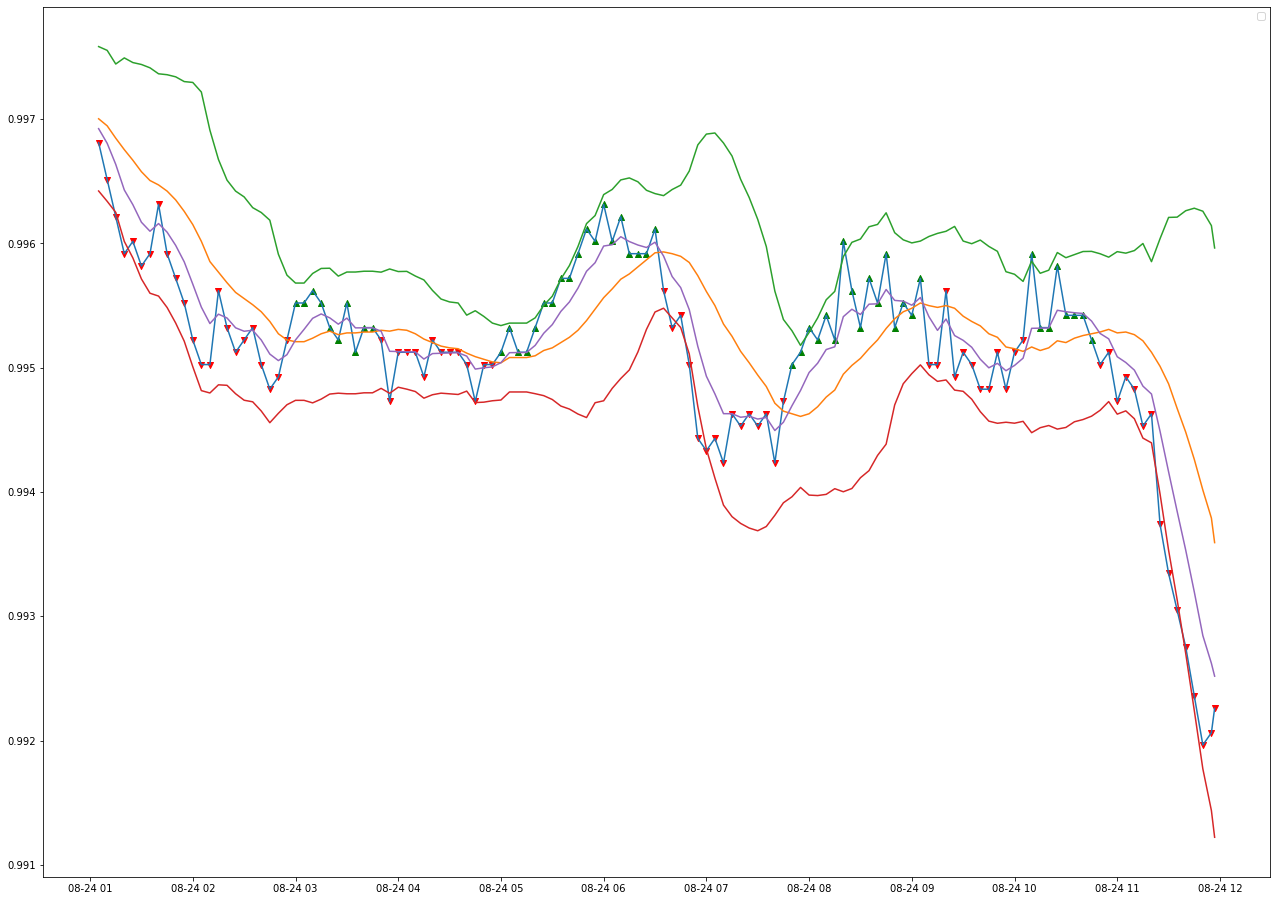

In [19]:
df=yf.download(tickers='EURUSD=X', period='1d', interval='5m')
df['SMA']=df.Close.rolling(window=14).mean()
df['EMA']=df.Close.ewm(span=6).mean()
df['stddev']=df.Close.rolling(window=14).std()
df['Upper']=df.SMA +2*df.stddev
df['Lower']=df.SMA -2*df.stddev
#df['Buy_Signal']=np.where(np.logical_and(df.Open<df.Close,df.EMA>df.Close))
df['Buy_Signal']=np.where(df.SMA<df.EMA, True, False)
#need to add multiple conditions to this one 
df['Sell_Signal']=np.where(df.SMA>df.EMA, True, False)
df=df.dropna()

plt.figure(figsize=(22,16))
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^',color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v',color='r')
plt.plot(df[['Close','SMA','Upper','Lower','EMA']])
plt.legend()
plt.show()

In [28]:
buys=[]
sells=[]
open_pos=False

for i in range(len(df)):
  if df.SMA[i]<df.EMA[i]:
    if df.Open[i]<df.Close[i]:
      if df.EMA[i]>df.Open[i]:
        if df.SMA[i]>df.Open[i]:
          buys.append(i)
          open_pos=True
  elif df.SMA[i]>df.EMA[i]:
     if df.Open[i]>df.Close[i]:
      if df.EMA[i]<df.Open[i]:
        if df.SMA[i]<df.Open[i]:
          sells.append(i)
          open_pos=True     


In [29]:
buys
sells

[0, 14, 33, 34, 43, 44, 66, 97, 107]

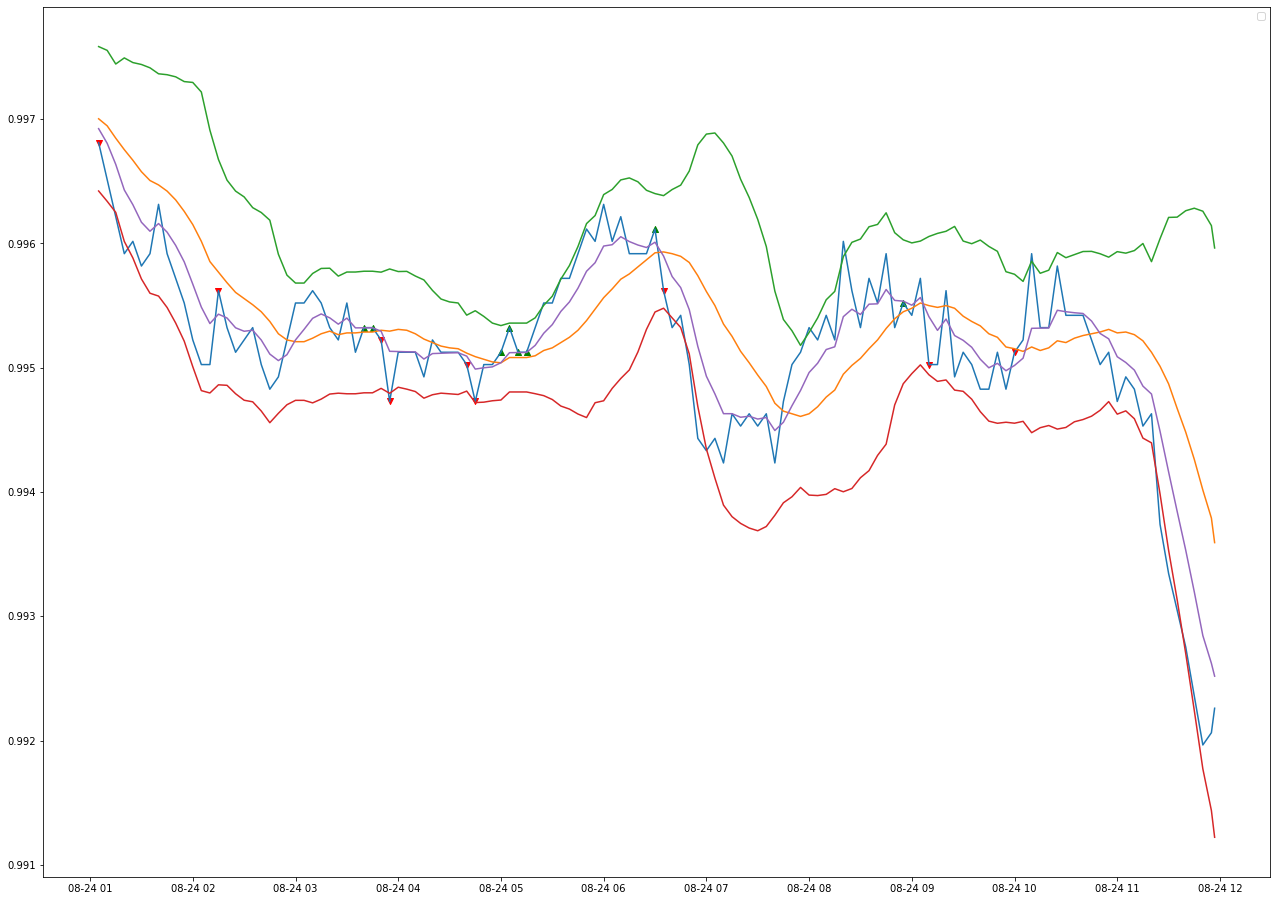

In [30]:
plt.figure(figsize=(22,16))
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^',color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v',color='r')
plt.plot(df[['Close','SMA','Upper','Lower','EMA']])
plt.legend()
plt.show()